In [1]:
# task one
import time
import pandas as pd
import numpy as np
import math
t = []
for x in range(1):
    startScript = time.time()
    ppl = pd.read_csv("people.csv")
    center=pd.read_csv("ppv.csv")
    dfppl = pd.DataFrame(ppl)
    dfppv = pd.DataFrame(center)

    distancelist = []
    assignlist = []
    distance = 0
    for num1 in dfppl['People']:
        for num2 in dfppv['PPV']:
                distance = math.sqrt((dfppv.iloc[num2].loc["Lat"] - dfppl.iloc[num1].loc["Lat"] )**2 + (dfppv.iloc[num2].loc["Lon"] - dfppl.iloc[num1].loc["Lon"])**2)
                distancelist.append(distance)
        minvalue = min(distancelist)
        minindex = distancelist.index(minvalue)
        assignlist.append(minindex)
        distancelist.clear()

    dfppl['PPV'] = assignlist
    
    endScript = time.time()
    timeOfScript = endScript - startScript
    timer = round(timeOfScript/60, 4)
    t.append(timer)

dfppl

,People,Lat,Lon,PPV
0,0,2.868615,101.673326,0
1,1,2.878383,101.607508,44
2,2,2.871754,101.599514,44
3,3,3.027363,101.652546,2
4,4,2.997368,101.626043,19
...,...,...,...,...
9995,9995,2.995173,101.695038,40
9996,9996,3.006136,101.693904,40
9997,9997,2.970721,101.716344,58
9998,9998,2.980272,101.644367,2


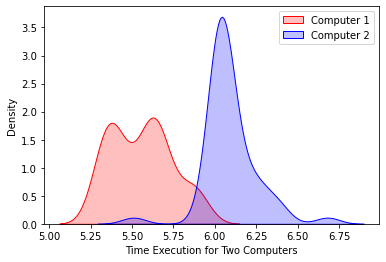

In [2]:
# task one's shaded density plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


time1 = [5.9, 5.6, 5.6, 5.32, 5.4, 5.35, 5.34, 5.33, 5.56, 5.89, 
      5.61, 5.6, 5.66, 5.33, 5.49, 5.62, 5.57, 5.64, 5.4, 5.38, 
      5.36, 5.36, 5.36, 5.82, 5.44, 5.44, 5.32, 5.31, 5.4, 5.5,
      5.44, 5.32, 5.6, 5.6, 5.62, 5.36, 5.9, 5.7, 5.66, 5.87, 
      5.64, 5.63, 5.42, 5.69, 5.87, 5.67, 5.69, 5.71, 5.82, 5.68]
time2 = [6.08, 6.13, 6.24, 6.18, 6.06, 6.13, 6.09, 6.06, 6.06, 6.05, 
      6.06, 6.22, 6.38, 6.35, 6.68, 6.4, 6.27, 6.16, 6.15, 6.29, 
      6.25, 6.02, 6.0, 6.02, 6.0, 6.03, 6.05, 6.02, 6.03, 6.03,
      6.03, 6.0, 5.93, 6.08, 6.0, 5.51, 6.02, 6.03, 6.05, 6.06, 
      6.06, 6.03, 6.04, 6.07, 6.08, 6.0, 5.98, 6.02, 6.03, 5.99]


df = pd.DataFrame(list(zip(time1, time2)),
               columns =['Computer 1', 'Computer 2'])

p1=sns.kdeplot(df['Computer 1'], shade=True, color="r",label = 'Computer 1')
p1=sns.kdeplot(df['Computer 2'], shade=True, color="b", label = 'Computer 2')
plt.xlabel("Time Execution for Two Computers")

plt.legend()

In [2]:
#task 2 , methode one
#Haversine formula and data frame
import time
import pandas as pd
import numpy as np
import math
R = 6371000
t = []

for x in range(1):
    startScript = time.time()
    ppl = pd.read_csv("people.csv")
    center=pd.read_csv("ppv.csv")
    dfppl = pd.DataFrame(ppl)
    dfppv = pd.DataFrame(center)

    distancelist = []
    assignedlist = []
    i = 0
    while i < 10000:
        j = 0
        while j < 100 :
            phi_1 = math.radians(dfppl.iloc[num1].loc["Lat"])
            phi_2 = math.radians(dfppv.iloc[num2].loc["Lat"])
            delta_phi = math.radians(dfppv.iloc[num2].loc["Lat"]-dfppl.iloc[num1].loc["Lat"])
            delta_lambda = math.radians(dfppv.iloc[num2].loc["Lon"]-dfppl.iloc[num1].loc["Lon"])
            j += 1

            a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
            c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
            meters = R * c
            distancelist.append(meters)
        minvalue = min(distancelist)
        minindex = distancelist.index(minvalue)
        assignedlist.append(minindex)
        distancelist.clear()
        i += 1

    dfppl['PPV'] = assignedlist
    
    endScript = time.time()
    timeOfScript = endScript - startScript
    timer = round(timeOfScript/60, 4)
    t.append(timer)
dfppl

,People,Lat,Lon,PPV
0,0,2.868615,101.673326,0
1,1,2.878383,101.607508,0
2,2,2.871754,101.599514,0
3,3,3.027363,101.652546,0
4,4,2.997368,101.626043,0
...,...,...,...,...
9995,9995,2.995173,101.695038,0
9996,9996,3.006136,101.693904,0
9997,9997,2.970721,101.716344,0
9998,9998,2.980272,101.644367,0


In [3]:
#method 2
# array and for loop
import time
import pandas as pd
import numpy as np
import math
ppl = pd.read_csv("people.csv")
center=pd.read_csv("ppv.csv")
dfppl = pd.DataFrame(ppl)
dfppv = pd.DataFrame(center)

arrppvlat = dfppv["Lat"].to_numpy()
arrppvlon = dfppv["Lon"].to_numpy()
arrppllat = dfppl["Lat"].to_numpy()
arrppllon = dfppl["Lon"].to_numpy()

t = []
for x in range(1):
    startScript = time.time()
    i = 0
    distancelist =[]
    assignedlist = []
    while i < 10000:
        j = 0
        while j < 100 :
            distance = math.sqrt((arrppvlat[j]-arrppllat[i])**2 + (arrppvlon[j]-arrppllon[i])**2)
            distancelist.append(distance)
            j += 1

        arrdistance = np.array(distancelist)
        minindex = np.argmin(arrdistance)
        assignedlist.append(minindex)
        distancelist.clear()
        i += 1

    dfppl['PPV'] = assignedlist
    
    endScript = time.time()
    timeOfScript = endScript - startScript
    timer = round(timeOfScript/60, 4)
    t.append(timer)

dfppl

,People,Lat,Lon,PPV
0,0,2.868615,101.673326,0
1,1,2.878383,101.607508,44
2,2,2.871754,101.599514,44
3,3,3.027363,101.652546,2
4,4,2.997368,101.626043,19
...,...,...,...,...
9995,9995,2.995173,101.695038,40
9996,9996,3.006136,101.693904,40
9997,9997,2.970721,101.716344,58
9998,9998,2.980272,101.644367,2


In [4]:
#method 3
#list and distance formula
import time
import pandas as pd
import numpy as np
import math

ppl = pd.read_csv("people.csv")
center=pd.read_csv("ppv.csv")
dfppl = pd.DataFrame(ppl)
dfppv = pd.DataFrame(center)

ppllat = dfppl['Lat'].values.tolist()
ppllon = dfppl['Lon'].values.tolist()
ppvlat = dfppv['Lat'].values.tolist()
ppvlon = dfppv['Lon'].values.tolist()
    
t=[]
for x in range(1):
    startScript = time.time()
    distancelist =[]
    assignedlist = []
    
    for num1 in dfppl['People']:
        for num2 in dfppv['PPV']:

            distance = math.sqrt((ppvlat[num2]-ppllat[num1])**2 + (ppvlon[num2]-ppllon[num1])**2)
            distancelist.append(distance)
            
        minvalue = min(distancelist)
        minindex = distancelist.index(minvalue)
        assignedlist.append(minindex)
        distancelist.clear()
        num1+=1

    dfppl['PPV'] = assignedlist
    endScript = time.time()
    timeOfScript = endScript - startScript
    timer = round(timeOfScript/60, 4)
    t.append(timer)

dfppl

,People,Lat,Lon,PPV
0,0,2.868615,101.673326,0
1,1,2.878383,101.607508,44
2,2,2.871754,101.599514,44
3,3,3.027363,101.652546,2
4,4,2.997368,101.626043,19
...,...,...,...,...
9995,9995,2.995173,101.695038,40
9996,9996,3.006136,101.693904,40
9997,9997,2.970721,101.716344,58
9998,9998,2.980272,101.644367,2


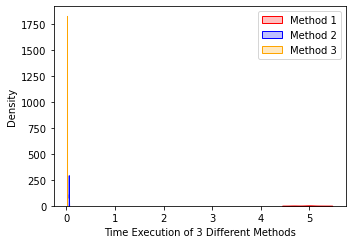

In [4]:
# task two's shaded density plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

method1time =[4.8903, 4.8489, 4.9133, 4.9999, 4.9815, 5.0442, 5.1498, 5.0604, 5.0214, 4.8649,
             4.7231, 4.6813, 4.6806, 4.7005, 4.6619, 4.6741, 4.6707, 4.6638, 4.6774, 4.6667, 
             4.6573, 4.6802, 4.7251, 5.0926, 4.9604, 5.0289, 5.0031, 4.999, 4.9601, 4.8957,
             5.0642, 5.0103, 5.0176, 5.1783, 5.2555, 5.039, 5.0032, 4.983, 5.0002, 4.9598,
             5.0286, 5.0189, 4.981, 4.9929, 5.0077, 4.9746, 4.9681, 4.9889, 4.9826, 5.0522]
method2time = [0.0492, 0.0495, 0.0494, 0.0492, 0.0497, 0.05, 0.0493, 0.049, 0.0534, 0.0519,
               0.0503, 0.0491, 0.0499, 0.0503, 0.0503, 0.0501, 0.0493, 0.0494, 0.0497, 0.053, 
               0.0508, 0.0498, 0.0498, 0.0494, 0.0496, 0.0509, 0.0505, 0.0501, 0.0499, 0.0501, 
               0.0497, 0.0497, 0.0496, 0.0499, 0.0504, 0.0503, 0.0508, 0.051, 0.0546, 0.053, 
               0.0525, 0.0535, 0.0532, 0.0535, 0.0547, 0.0531, 0.0542, 0.0528, 0.0531, 0.0538]
method3time = [0.0137, 0.0133, 0.0131, 0.0132, 0.0132, 0.0135, 0.0137, 0.0133, 0.0133, 0.0134,
               0.014, 0.0135, 0.0138, 0.0134, 0.0134, 0.0135, 0.0137, 0.0135, 0.0132, 0.0141, 
               0.0135, 0.0134, 0.0132, 0.0132, 0.0132, 0.0133, 0.0134, 0.0134, 0.0133, 0.0134, 
               0.0139, 0.0136, 0.0135, 0.0135, 0.0134, 0.0135, 0.0136, 0.0136, 0.0136, 0.0136, 
               0.0138, 0.0137, 0.0134, 0.0133, 0.0137, 0.0134, 0.0134, 0.0133, 0.0136, 0.0134]

df = pd.DataFrame(list(zip(method1time, method2time,method3time)),
               columns =['Method 1', 'Method 2','Method 3'])


plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True
#plt.ylim(0, 10)


p1=sns.kdeplot(df['Method 1'], shade=True, color="r",label = 'Method 1')
p1=sns.kdeplot(df['Method 2'], shade=True, color="b", label = 'Method 2')
p1=sns.kdeplot(df['Method 3'], shade=True, color="orange", label = 'Method 3')
plt.xlabel("Time Execution of 3 Different Methods")
plt.legend()
